In [1]:
# Helper functions
from notebooks.util.distribution_utils import *

from liquidity.util.utils import compute_returns
from hurst_exponent.util.utils import augmented_dickey_fuller

In [2]:
# Automatically reload changes in package dependencies
%load_ext autoreload
%autoreload 2

In [3]:
# Number of events to use
EVENTS_RANGE = 100000

## Load raw sample data

In [13]:
# Load orderbook raw sample data
stocks = ['TSLA', 'AMZN', 'NFLX', 'MSFT', 'EBAY', 'APPL']

current_dir = os.path.abspath('.')
root_dir = os.path.join(current_dir, '..', '..')
data_dir = os.path.join(root_dir, 'data', 'market_orders')

stock_dfs = {}

# Loop through each stock
for stock in stocks:

    filename = f"{stock}-2016-R1.csv"

    stock_file_path = os.path.join(data_dir, filename)

    # Read the CSV and store in the dictionary
    stock_dfs[stock] = pd.read_csv(stock_file_path)

# Access the dataframe using stock's ticker as key
tsla_raw_df = stock_dfs['TSLA']
amzn_raw_df = stock_dfs['AMZN']
nflx_raw_df = stock_dfs['NFLX']
msft_raw_df = stock_dfs['MSFT']
ebay_raw_df = stock_dfs['EBAY']
appl_raw_df = stock_dfs['APPL']

In [14]:
# Compute returns
tsla_returns = compute_returns(tsla_raw_df)['returns']
msft_returns = compute_returns(msft_raw_df)['returns']
amzn_returns = compute_returns(amzn_raw_df)['returns']
nflx_returns = compute_returns(nflx_raw_df)['returns']
ebay_returns = compute_returns(ebay_raw_df)['returns']
appl_returns = compute_returns(appl_raw_df)['returns']

returns = {
  'TSLA': tsla_returns,
  'MSFT': msft_returns,
  'AMZN': amzn_returns,
  'NFLX': nflx_returns,
  'EBAY': ebay_returns,
  'APPL': appl_returns
}

## 2. Stationarity Test

To test whether our time series are stationary, we perform an augmented Dickey-Fuller test on each series, which uses the following null and alternative hypotheses:

- **H0:** The time series is non-stationary.
  - In other words, it has some time-dependent structure and does not have constant variance over time.
  - There is at least one unit root.

- **H1:** The time series is stationary.

- **Note:** If the p-value from the test is less than some significance level (e.g. $\alpha$ = .05), then we can reject the null hypothesis and conclude that the time series is stationary.

In [6]:
# ADF test
for stock, data in returns.items():
    augmented_dickey_fuller(data.head(EVENTS_RANGE), stock)

TSLA
ADF: -320.14
p-value: 0.00,
N: 99999, 
critical values: {'1%': -3.4304153953326493, '5%': -2.8615689037124814, '10%': -2.566785384434747}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


MSFT
ADF: -319.31
p-value: 0.00,
N: 99999, 
critical values: {'1%': -3.4304153953326493, '5%': -2.8615689037124814, '10%': -2.566785384434747}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


AMZN
ADF: -322.06
p-value: 0.00,
N: 99999, 
critical values: {'1%': -3.4304153953326493, '5%': -2.8615689037124814, '10%': -2.566785384434747}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.


NFLX
ADF: -178.95
p-value: 0.00,
N: 99997, 
critical values: {'1%': -3.4304153966406288, '5%': -2.8615689042905816, '10%': -2.5667853847424507}
We reject the null hypothesis at a significance level of 0.05.
The time series appears to be stationary.



## 3. Plot density functions of returns

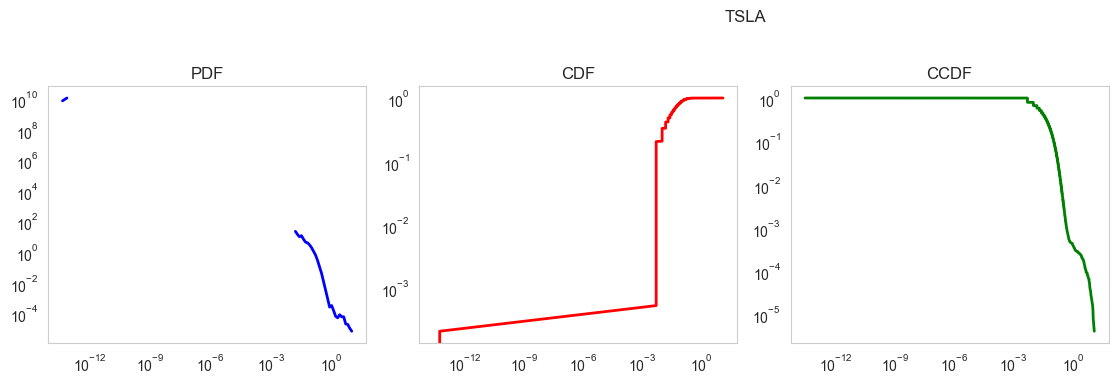

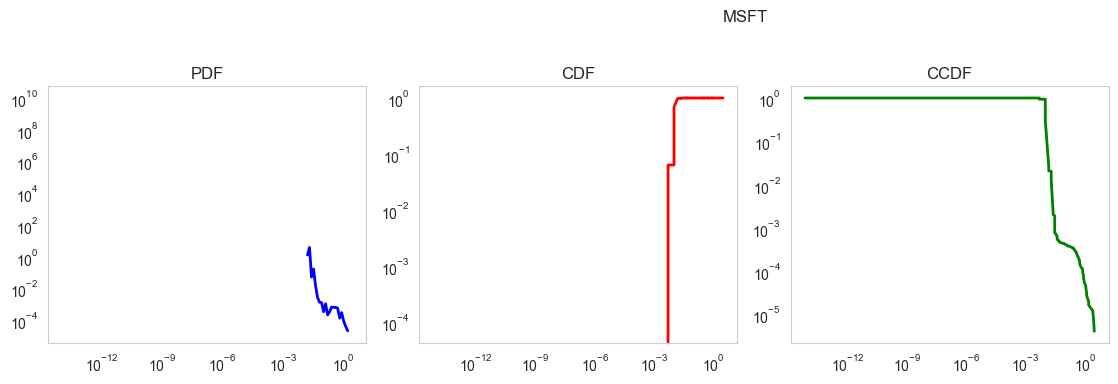

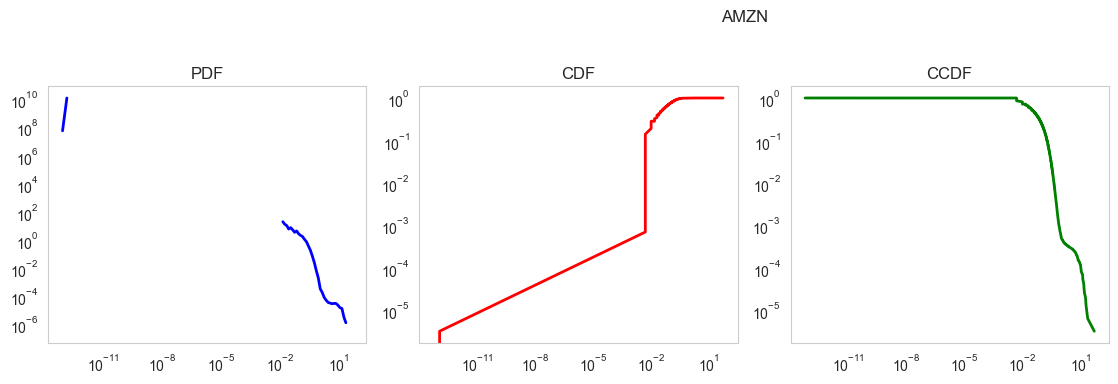

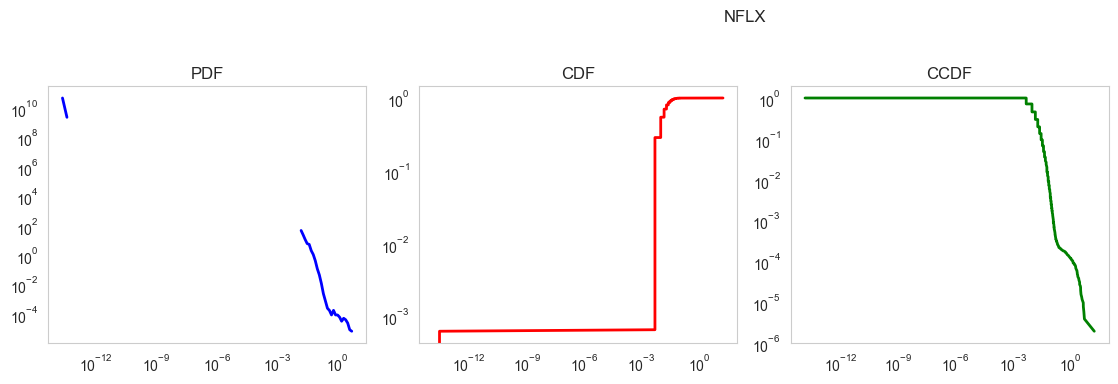

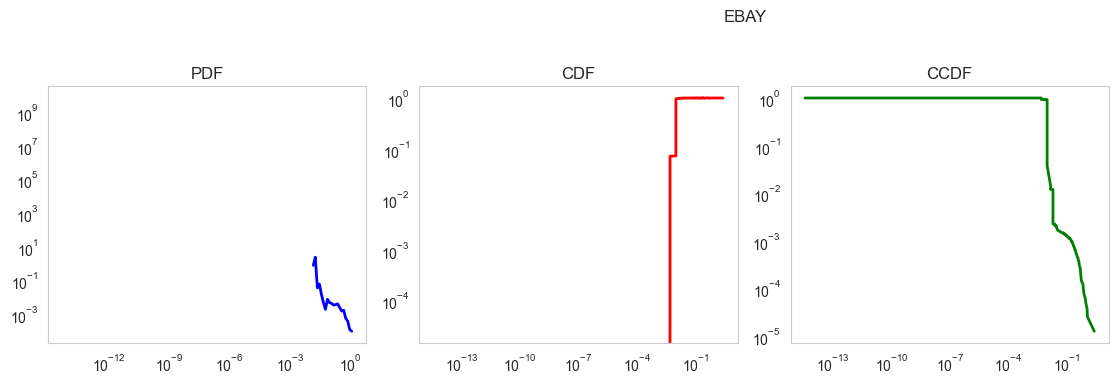

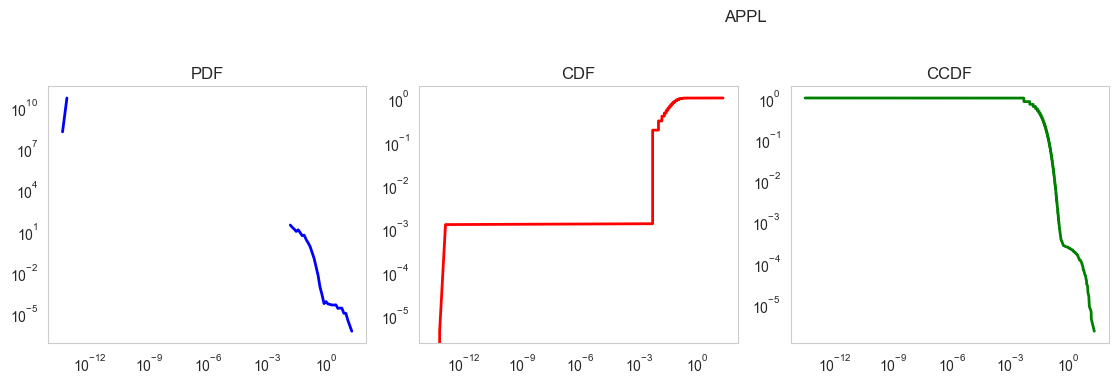

In [7]:
# Plot for each stock
for stock_name, data in returns.items():
    plot_distributions(stock_name, data)

## 4. Fit power law distribution

In [15]:
# 1. Fit Powerlaw and retrieve fitted object/ results
filename = os.path.join(data_dir, 'data', 'generated', 'mo_data', 'distributions' 'mo_return_distributions.pkl')

# If the file doesn't exist, fit the series and save the results.
if not os.path.exists(filename):
    # tsla_fit = fit_powerlaw("TSLA", tsla_returns, filename)
    fit_objects = fit_powerlaw(returns, filename)
else:
    fit_objects = load_fit_objects(filename)

fit_objects

Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
File default.pkl already exists. Skipping.


{'TSLA': <powerlaw.Fit at 0x2a32b2890>,
 'MSFT': <powerlaw.Fit at 0x2a32b2f90>,
 'AMZN': <powerlaw.Fit at 0x2a33372d0>,
 'NFLX': <powerlaw.Fit at 0x2a3337410>,
 'EBAY': <powerlaw.Fit at 0x2a32971d0>,
 'APPL': <powerlaw.Fit at 0x2a3296890>}

In [9]:
fit_objects

{'TSLA': <powerlaw.Fit at 0x2a31fbe90>,
 'MSFT': <powerlaw.Fit at 0x316fdfad0>,
 'AMZN': <powerlaw.Fit at 0x2a33a1c90>,
 'NFLX': <powerlaw.Fit at 0x2a33c8110>,
 'EBAY': <powerlaw.Fit at 0x2a3398390>,
 'APPL': <powerlaw.Fit at 0x2a339be90>}

/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
/Users/ana_bugaenko/.conda/envs/py311/lib/python3.11/site-packages/powerlaw.py:1615: RuntimeWarning: divide by zero encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
'nan' in fit cumulative distribution values.
Likely underflow or ov

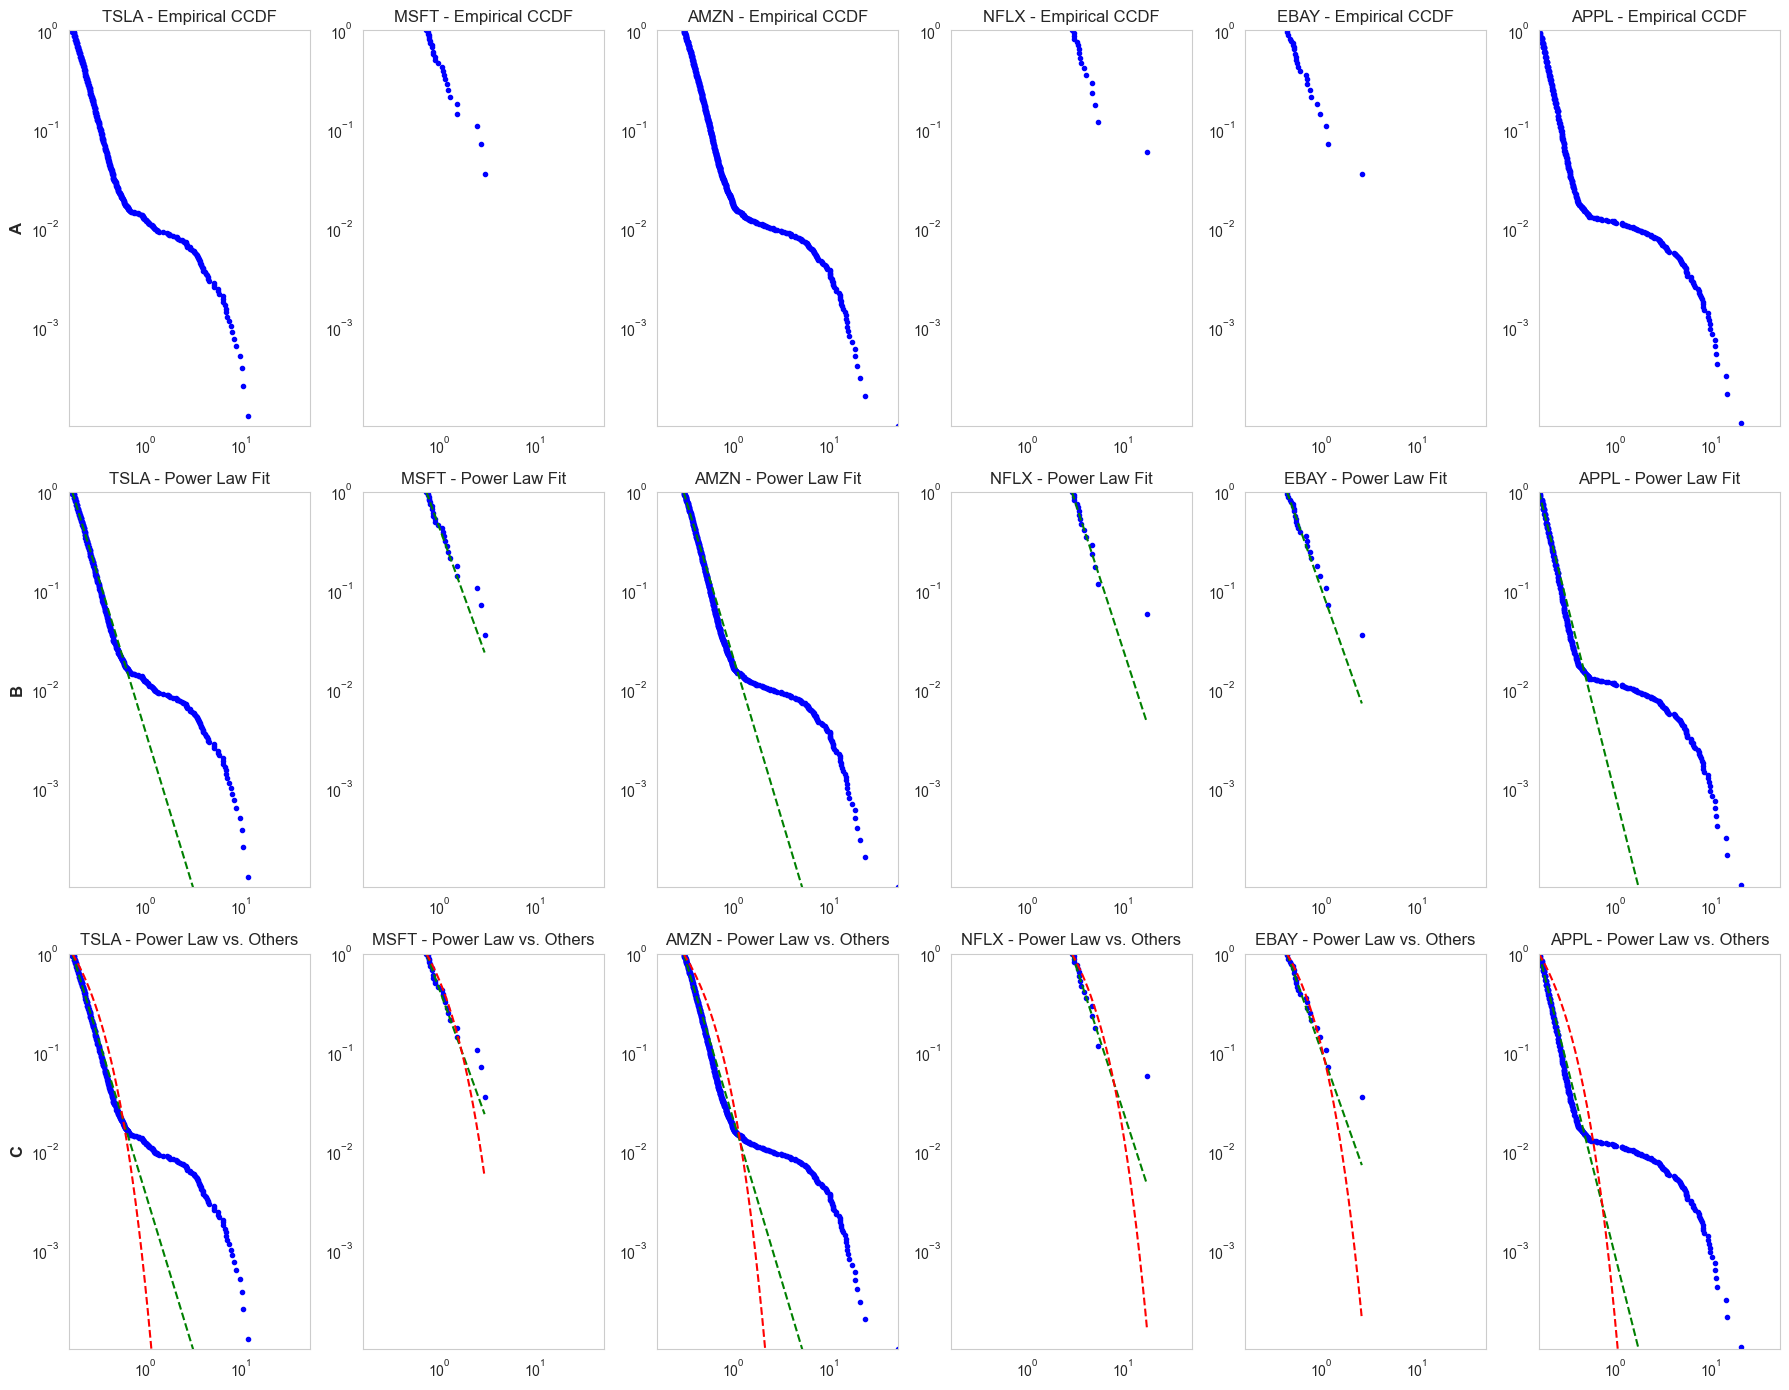

In [15]:
# Plot fitted objects
plot_fit_objects(fit_objects)

### 4.1. Retrieve Power law fitting results

In [16]:
# Get fitting parameters for specific distribution across all stocks
power_results = get_fitting_params(fit_objects, 'power_law')
print(power_results)

  Stock Distribution     alpha   xmin  KS Distance
0  TSLA    power_law  4.168750  0.175     0.046951
1  MSFT    power_law  3.666684  0.740     0.078051
2  AMZN    power_law  4.225545  0.305     0.031444
3  NFLX    power_law  3.974212  2.940     0.079087
4  EBAY    power_law  3.732640  0.440     0.081979
5  APPL    power_law  4.838828  0.160     0.055147


In [17]:
# Average Alpha exponents across stocks
min_alpha = power_results['alpha'].min()
max_alpha = power_results['alpha'].max()
avg_alpha = power_results['alpha'].mean()
std_dev_alpha = power_results['alpha'].std()

print(f"Min Alphaa: {min_alpha}")
print(f"Max Alphaa: {max_alpha}")
print(f"Average Alphaa: {avg_alpha}")
print(f"std_dev_alpha: {std_dev_alpha}")

Min Alphaa: 3.6666837394081133
Max Alphaa: 4.838827838679827
Average Alphaa: 4.1011096370660205
std_dev_alpha: 0.42541423300855186


### 4.2. Compare Alternative Distributions

In [18]:
# Compare against alternative heavy-tailed distributions
from IPython.display import display
powerlaw_exonential = distribution_compare(fit_objects, 'exponential')
display(powerlaw_exonential)

,Stock,Alternative Distribution,Lambda,xmin,Power Law Alpha,KS Distance (Power Law),KS Distance (exponential),Loglikelihood Ratio,p-value
0,TSLA,exponential,9.242861,0.175,4.168750,0.046951,0.203513,9.694856,3.170851e-22
1,MSFT,exponential,2.296925,0.740,3.666684,0.078051,0.170427,1.460363,1.441904e-01
2,AMZN,exponential,4.939013,0.305,4.225545,0.031444,0.231032,10.412466,2.175127e-25
3,NFLX,exponential,0.584483,2.940,3.974212,0.079087,0.199483,1.564487,1.177033e-01
4,EBAY,exponential,3.825132,0.440,3.732640,0.081979,0.179619,1.228318,2.193277e-01
5,APPL,exponential,10.191810,0.160,4.838828,0.055147,0.291514,11.794545,4.164450e-32
